# ¿Cuánto cree la IA que vale tu casa?

Comencemos con un ejemplo típico dentro del mundo de la machine-learning (¡gracias, Andrew Ng!): predecir cuánto vale una casa en base a sus características ('features'). Las características son el conjunto de atributos de la casa sobre la que queremos predecir el precio: por ejemplo 'm²', 'n_plantas', 'n_habitaciones' , etc... 

¿Has notado que solo he mencionado características numéricas? Esto es por que los modelos de ML 'entienden' mucho mejor los números, que los datos en otro formato. De hecho lo que mejor admiten son arrays de números normalizados (en el rango [0,1]). Quizás estás pensando que hay factores de naturaleza no numérica, que previsiblemente influirán en el precio de la casa que estamos prediciendo. Por ejemplo: la localización (¿En qué país está la casa?, ¿en qué barrio está?, ¿cuánto vale el metro cuadrado en esa zona?). El proceso para transformar estos datos en numéricos, se llama 'codificación' o 'encoding'.

Pero vamos a empezar por el principio: hemos elegido un dataset (conjunto de datos necesario para entrenar al modelo) de [Kaggle](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset).

## Exploración de los datos

In [1]:
import pandas as pd                      # librerías básicas para la manipulación de datos en ML
import numpy  as np                      # librerías básicas para la manipulación de datos en ML

In [2]:
dataset = pd.read_csv('dataset.csv')     # lectura del dataset

In [3]:
list(dataset.columns)                    # lista de 13 características

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [4]:
dataset.shape                            # tamaño del dataset

(545, 13)

Tenemos un dataset de 545 registros, y 13 características para cada registro

In [5]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


¡Wow! Tenemos un montón de información. Comencemos con las columnas numéricas

In [6]:
numeric_dataset = dataset.select_dtypes(include='number')
numeric_dataset

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


Estaría bien poder hacer un resumen de los datos...

In [7]:
numeric_dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


¿Hay algún valor nulo que nos vaya a jo**r la inferencia?

In [8]:
numeric_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
dtypes: int64(6)
memory usage: 25.7 KB


#### Separar Características y objetivo

¿Qué queremos predecir? El precio

¿Qué tenemos para predecirlo? El resto de columnas. Comencemos comparando precio vs área:

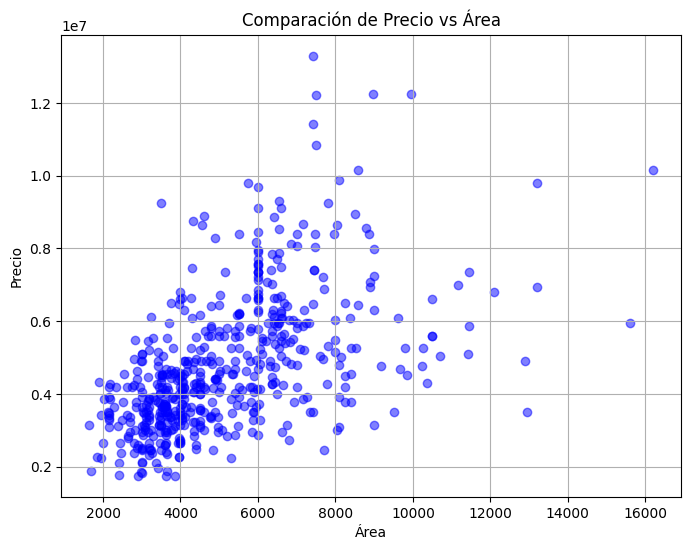

In [9]:
import matplotlib.pyplot as plt                                                                 # import por defecto para plots y visualización de datos

plt.figure(figsize=(8, 6))
plt.scatter(dataset['area'], dataset['price'], color='blue', alpha=0.5)
plt.title('Comparación de Precio vs Área')
plt.xlabel('Área')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

#### Enfoque Naive 
Como podemos ver hay una correlación lineal entre el área y el precio de una casa, un enfoque básico sería intentar hallar la línea recta que minimiza la suma de las distancias cuadráticas (errores cuadráticos) de todos los registros. Queremos encontrar los parámetros óptimos de la ecuación de una recta $y = bx + a + \epsilon $ o, en términos de parámetros, $$y = \theta_1 \cdot x + \theta_0 + \epsilon$$

Vectorialmente, esta relación lineal se puede representar como $y = \mathbf{\theta}^T \cdot [x, 1]$, donde $\mathbf{\theta} = [\theta_1, \theta_0]^T$ es el vector de parámetros y $[x, 1]$ representa el vector de características ampliado con un término constante para incorporar $\theta_0$

In [10]:
# ¿Cómo podemos resolver el sistema?
# https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados_ordinarios#Modelo_de_regresi%C3%B3n_simple

X_mean = np.mean(dataset['area'])                                                                                    # características con las que predecimos
Y_mean = np.mean(dataset['price'])                                                                                   # característica a predecir
beta_1 = np.sum((dataset['area'] - X_mean) * (dataset['price'] - Y_mean)) / np.sum((dataset['area'] - X_mean) ** 2)  # pendiente
beta_0 = Y_mean - beta_1 * X_mean                                                                                    # valor cuando x=0

In [11]:
beta_1

461.9748942727835

In [12]:
beta_0

2387308.48239643

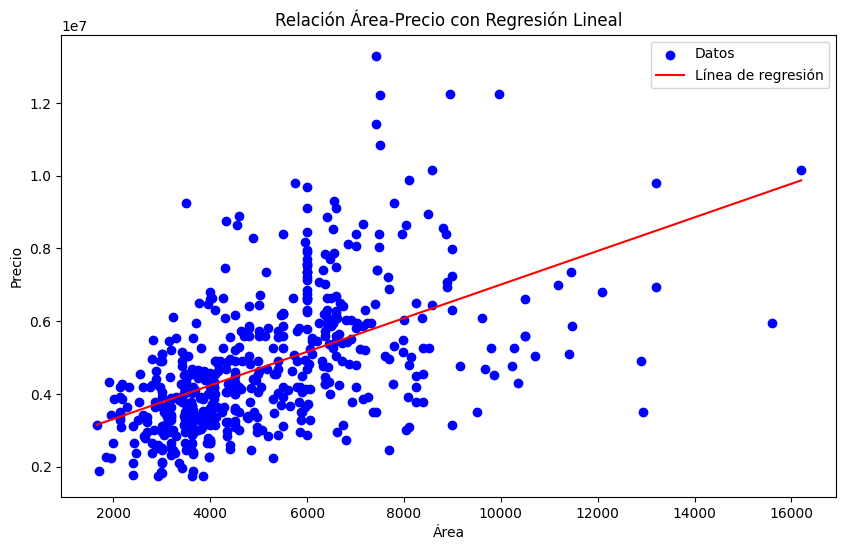

In [13]:
# Función para la línea de regresión
def regression_line(x):
    return beta_0 + beta_1 * x

# Valores para la línea de regresión
x_values = np.linspace(dataset['area'].min(), dataset['area'].max(), 100)  # 100 puntos entre el min y max de 'area'
y_values = regression_line(x_values)

# Creando la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(dataset['area'], dataset['price'], color='blue', label='Datos')  # Datos reales
plt.plot(x_values, y_values, color='red', label='Línea de regresión')  # Línea de regresión
plt.title('Relación Área-Precio con Regresión Lineal')
plt.xlabel('Área')
plt.ylabel('Precio')
plt.legend()
plt.show()

In [14]:
# Calcular el error cuadrático medio
predictions = beta_0 + beta_1 * dataset['area']
mse_train = np.mean((dataset['price'] - predictions) ** 2)
mse_train

2488861398180.6567

Parece que funciona, pero esto es sólo con los datos de entrenamiento. ¿Qué tal geralizará a en los otros conjuntos? Por otro lado, ya que los hemos calculado, para algo habrá que usarlos

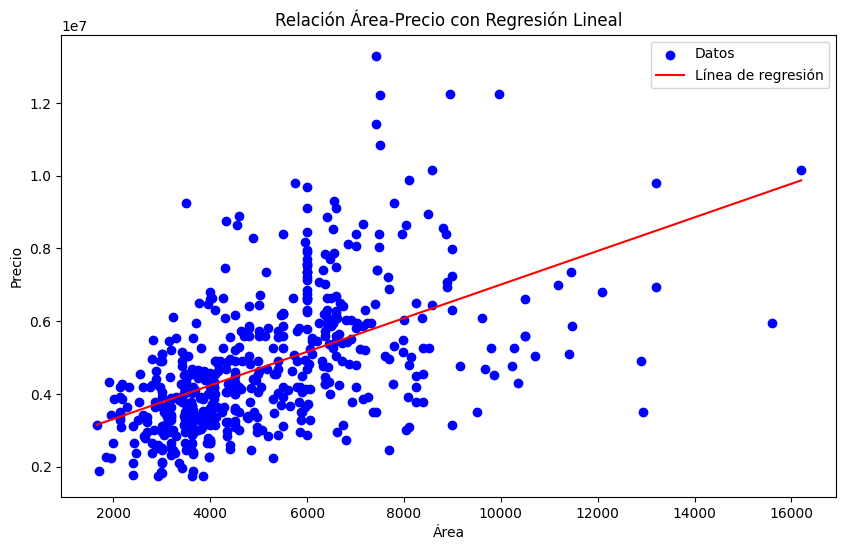

In [15]:
# Función para la línea de regresión
def regression_line(x):
    return beta_0 + beta_1 * x

# Valores para la línea de regresión
x_values = np.linspace(dataset['area'].min(), dataset['area'].max(), 100)  # 100 puntos entre el min y max de 'area'
y_values = regression_line(x_values)

# Creando la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(dataset['area'], dataset['price'], color='blue', label='Datos')  # Datos reales
plt.plot(x_values, y_values, color='red', label='Línea de regresión')  # Línea de regresión
plt.title('Relación Área-Precio con Regresión Lineal')
plt.xlabel('Área')
plt.ylabel('Precio')
plt.legend()
plt.show()

In [16]:
# Calcular el error cuadrático medio
predictions = beta_0 + beta_1 * dataset['area']
mse_test = np.mean((dataset['price'] - predictions) ** 2)
mse_test

2488861398180.6567

In [17]:
# Función para la línea de regresión
def regression_line(x):
    return beta_0 + beta_1 * x

# Valores para la línea de regresión
x_values = np.linspace(dataset['area'].min(), dataset['area'].max(), 100)  # 100 puntos entre el min y max de 'area'
y_values = regression_line(x_values)


In [18]:
# Calcular el error cuadrático medio
predictions = beta_0 + beta_1 * dataset['area']
mse_test = np.mean((dataset['price'] - predictions) ** 2)
mse_test

2488861398180.6567

Es un enfoque simplista, pero permite estimar si una vivienda esta infravalorada o sobrevalorada, en base a su precio y su área


## Interpolación polinómica
Para incrementar la precisión en la predicción del valor de una propiedad, podemos optar por polinomios de grado superior, lo que nos lleva a funciones no lineales. En un modelo lineal, la relación entre la variable dependiente $y$ (el precio) y la independiente $x$ (la superficie) se describe mediante la ecuación de una recta $y = mx + b$. En cambio, para un modelo polinomial de grado $n$, la relación se expresa como $y = b_0 + b_1x + b_2x^2 + ... + b_nx^n$, una función no lineal, donde $b_0, b_1, ..., b_n$ son los coeficientes.

El ajuste de este modelo polinómico se realiza a través del método de mínimos cuadrados, que busca minimizar la suma de los cuadrados de las diferencias entre los valores observados y los predichos. La función de costo asociada se define como $J(b_0, b_1, ..., b_n) = \frac{1}{2N} \sum_{i=1}^{N} (y_i - (b_0 + b_1x_i + b_2x_i^2 + ... + b_nx_i^n))^2$.

La meta es identificar los parámetros idóneos para nuestra función $f' = a x^2 + b x + c$ de tal manera que $f'(\text{area})$ se aproxime estrechamente al $\text{precio}$.

## Ejemplo: Ajuste a un Polinomio de Segundo Grado
Nos proponemos ajustar nuestros datos a una función de la forma $y = ax^2 + bx + c$, o en otras palabras, nuestro objetivo es resolver el sistema $y = X\beta$, donde $\beta$ representa el vector de coeficientes $[c, b, a]^T$.
### Procedimiento para aislar $\beta$
Para determinar los coeficientes $\beta$, reordenamos los términos de la siguiente forma:
1. Partimos de la ecuación inicial $y = X\beta$.
2. Multiplicamos ambos lados por $X^T$, la matriz transpuesta de $X$, obteniendo $(X^T y) = (X^T X)\beta$.
3. Aplicamos la matriz inversa de $(X^T X)$ a ambos lados, resultando en $(X^T X)^{-1} (X^T y) = \beta$.

Es importante recordar que la multiplicación de una matriz por su inversa nos da la matriz identidad $I$, y por ende, $(X^T X)^{-1} (X^T X) = I$. Utilizando esta propiedad, simplificamos la expresión a:

$ \beta = (X^T X)^{-1} X^T y $


In [19]:
x =  dataset['area']                                            # datos de ejemplo
y =  dataset['price']                                           # datos de ejemplo
X = np.column_stack((np.ones(x.shape[0]), x, x**2))             # calculamos x⁰, x¹, y x²
beta = np.linalg.inv(X.T @ X) @ X.T @ y                         # resolvemos el sistema y calculamos coeficientes
beta

array([ 7.95440758e+05,  1.03518489e+03, -4.35645185e-02])

Ya tenemos nuestra función $f'$ con coeficientes incluidos, vamos a plotearla con los datos y ver qué tal se ajusta

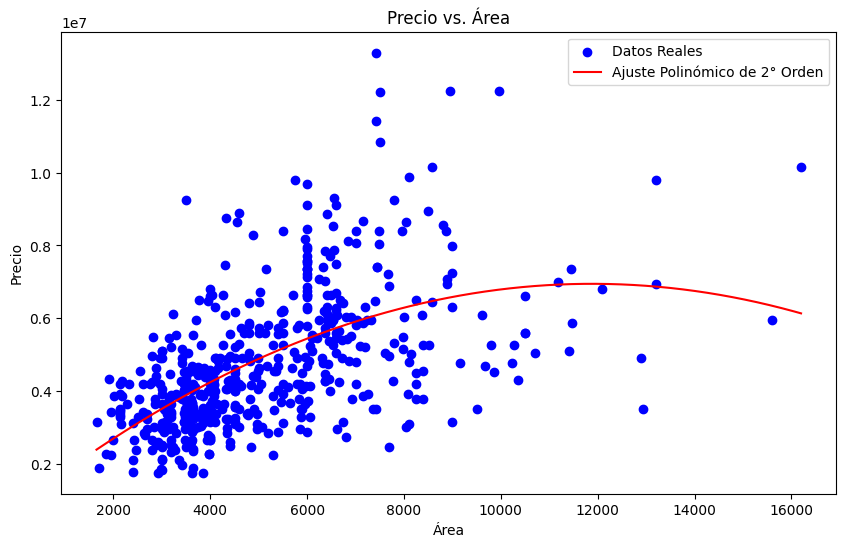

In [20]:
def polinomio(x):
    return beta[0] + beta[1]*x + beta[2]*(x**2)

area = dataset['area']
precio = dataset['price']

x_line = np.linspace(area.min(), area.max(), 400)
y_line = polinomio(x_line)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(area, precio, color='blue', label='Datos Reales')
plt.plot(x_line, y_line, color='red', label='Ajuste Polinómico de 2° Orden')
plt.title('Precio vs. Área')
plt.xlabel('Área')
plt.ylabel('Precio')
plt.legend()
plt.show()

##### Recursos
[Andrew Ng](https://www.coursera.org/specializations/machine-learning-introduction)

[GPT3.5](https://chat.openai.com)